# Titanic Prediction Using Ensemble Models 🌳🌳

### 1. Introduction
    - Dataset Introduction
    - Problem Statement
    - Questions to Asks
    - Project's Goals / Objectives

#### Dataset Introduction
- This project using a popular dataset named "Titanic - Machine Learning Disaster" on Kaggle. The dataset was a part of competition that suitable for those who start learning data science journey
- You Check the detail about the data from this link directed to official titanic prediction competition :
https://www.kaggle.com/competitions/titanic/data?select=train.csv

#### Problem Statement 
- We are not yet have deep understanding about the factors related to passenger survivality in titanic accident. By deepening our accident about that phenomenon would help us to learn few lessons about that accident and improve our analysis skill
- We need to create machine learning model to improve our machine learning skill. 

#### Goals / Objectives
1. Understand deeply about titanic accident from dataset. Several i question that we will answer : 
    - How many people survive ?
    - How many people survive based on demographics ? 
    - Further analysis will improved later
2. Create a machine learning that has high predictive power. We will evaluate model with accuracy  

### 2. Data Exploration & Data Cleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [27]:
df = pd.read_csv(r'D:/Data Science Project/Titanic Prediction (Improving)/train.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [31]:
print(f'Number of Duplicated df Data : {df.duplicated().sum()} Rows')

Number of Duplicated df Data : 0 Rows


In [32]:
# drop unused features 
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [33]:
print(f'Total Number of Missing df Data : {df.isnull().sum().sum()} Rows')
print(df.isnull().sum())

Total Number of Missing df Data : 179 Rows
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [34]:
# Loop over the columns in the DataFrame 
for i in df.columns: 
# Check if there are any missing values in the column 
	if (df[i].isnull().sum() > 0): 
	# Calculate the percentage of missing values 
		misval = (df[i].isnull().sum()) / (len(df[i])) * 100 
		# Print the name of the column and the percentage of missing values 
		print(f'{i} Perc. Mis Val = {misval:.2f} %')

Age Perc. Mis Val = 19.87 %
Embarked Perc. Mis Val = 0.22 %


We will replace the missing values on age with mean and missing values on embarked will replaced with mode 

In [35]:
# replace missing values on age with mean
mean = df['Age'].mean(skipna=True) 
df['Age'] = df['Age'].fillna(mean)

In [36]:
# replace missing value on embarked with mode
mode = df['Embarked'].mode() 
df['Embarked'] = df['Embarked'].fillna(mode[0])

In [37]:
print(f'Number of Missing Val = {df.isnull().sum().sum()}')

Number of Missing Val = 0


In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
plt.style.use('fivethirtyeight')
import warnings

%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [39]:
df = pd.read_csv(r'D:/Data Science Project/Titanic Prediction (Improving)/Titanic V2/Train Set/Cleaned Dataset.csv')

### 3. Exploratory Data Analysis

In [40]:
surv, not_surv =  df['Survived'].value_counts()[1], df['Survived'].value_counts()[0]

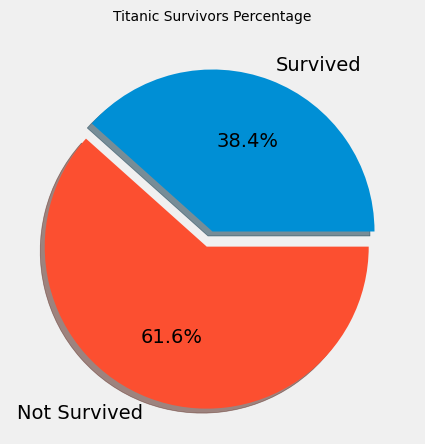

In [41]:
labels = ['Survived', 'Not Survived']
sizes = [surv, not_surv]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize = (7, 5))
ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow =True)
plt.title('Titanic Survivors Percentage', size = 10)

plt.show()

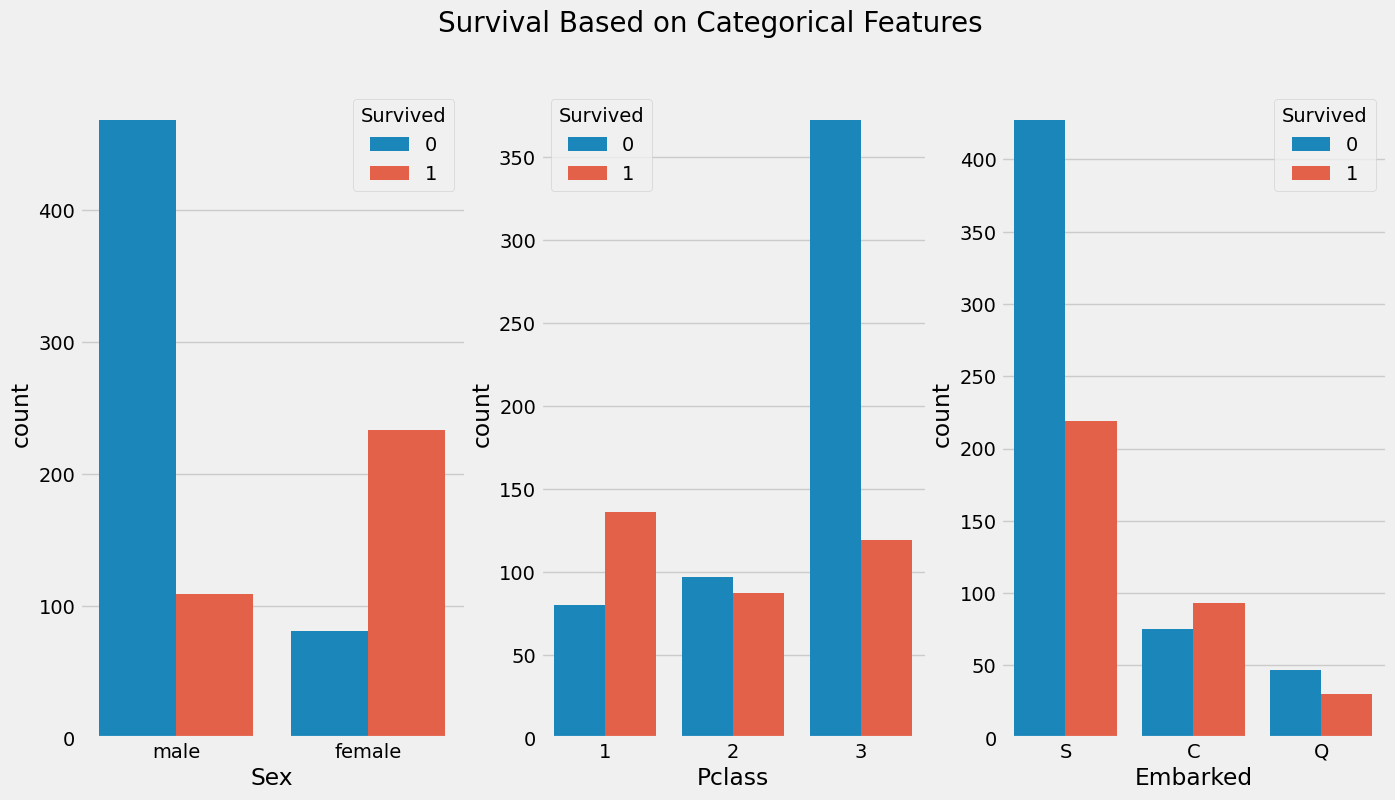

In [42]:
# Survived Based on Sex, PClass, Embarked and Fare
fig, ax = plt.subplots(1, 3, figsize = (15, 8))

plt.suptitle("Survival Based on Categorical Features", size = 20)

ax[0] = sns.countplot(x='Sex', hue='Survived', data = df, ax=ax[0])
ax[1] = sns.countplot(x='Pclass', hue='Survived', data = df, ax=ax[1])
ax[2] = sns.countplot(x='Embarked', hue='Survived', data = df, ax=ax[2])

sns.despine()

plt.show()

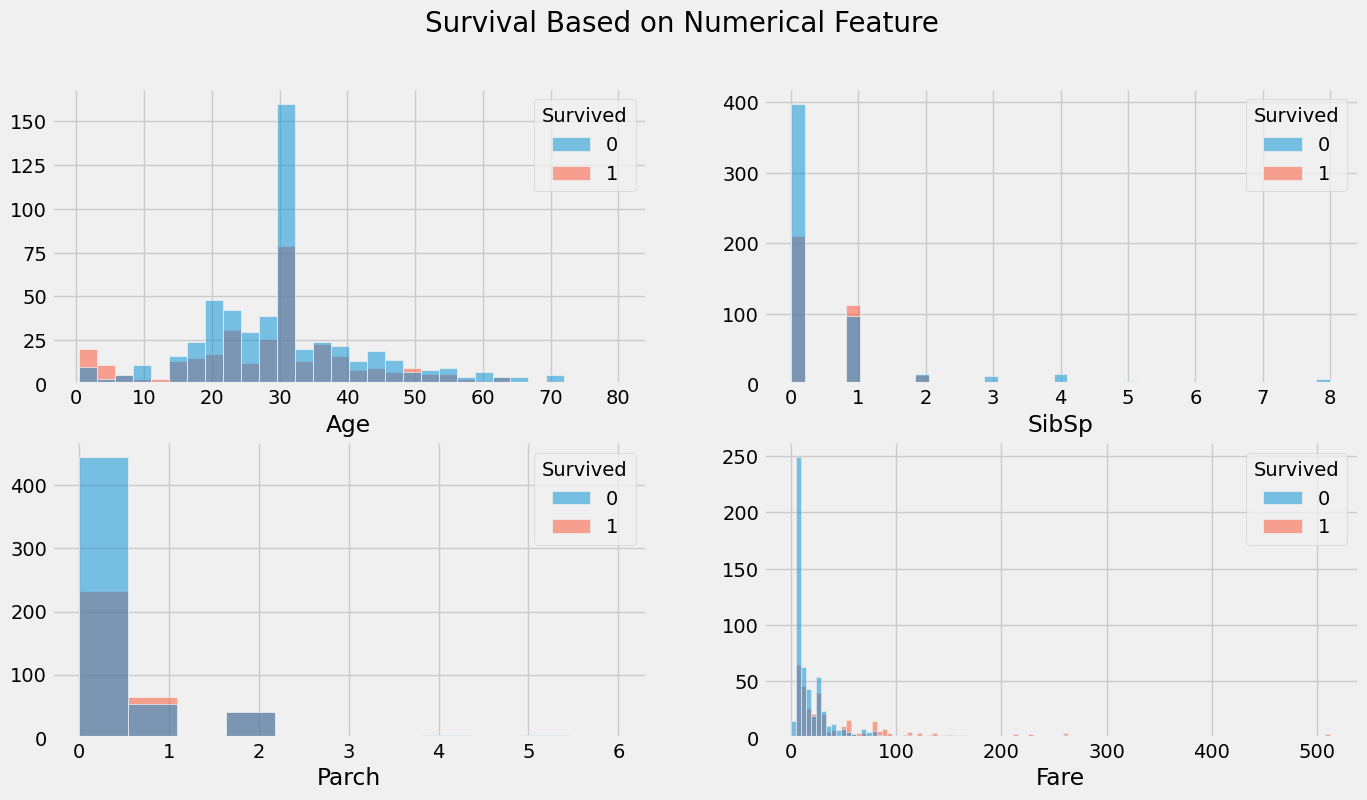

In [43]:
# Survived Based on Age and SibSp
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (15, 8))

plt.suptitle('Survival Based on Numerical Feature', size=20)

ax[0,0] = sns.histplot(x='Age', hue='Survived', data = df, ax=ax[0,0])
ax[0,1] = sns.histplot(x='SibSp', hue='Survived', data = df, ax=ax[0,1])
ax[1,0] = sns.histplot(x='Parch', hue='Survived', data = df, ax=ax[1,0])
ax[1,1] = sns.histplot(x='Fare', hue='Survived', data = df, ax=ax[1,1])

ax[0,0].set_ylabel('')
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel('')
ax[1,1].set_ylabel('')

sns.despine()

plt.show()

**Insights**
1. There is 38,4% passenger survived and the rest don't survived
2. Passenger who were a woman have higher number of people survived
3. Passenger who were a 1 Class have higher number of people survived
4. Passenger who were embarked from S harbour have higher number of people survived
5. Passenger who were young (age<5 years) and were productive (age 25 - 30) have higher number of people survived
6. Passenger who where alone (SibSp = 0) and with 

### 4. Perform Data Preprocessing 
Objectives : 
* Feature Engineering
* Feature Encoding 
* Outliers Detection
* Feature Scaling
* Splitting Data

In [44]:
# feature engineering : Create alone status
df['Alone'] = df['Parch'] + df['SibSp']
df['Alone'] = df['Alone'].apply(lambda x: 1 if x != 0 else 0)

In [45]:
# fix data types
df['Pclass'] = df['Pclass'].astype('object')
df['Alone'] = df['Alone'].astype('object')

In [46]:
# feature encoding 
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Alone'] = le.fit_transform(df['Alone'])
df = pd.get_dummies(df)

In [47]:
# feature scaling 
from sklearn.preprocessing import StandardScaler

df[['Age', 'Fare']] = StandardScaler().fit_transform(df[['Age', 'Fare']])

In [48]:
# outliers detection using Isolation Forest
from sklearn.ensemble import IsolationForest

isolation = IsolationForest(n_estimators = 100, contamination='auto')
isolation = isolation.fit(df[['Fare', 'Age']]) 
df['Anomalies_Score'] = isolation.decision_function(df[['Fare', 'Age']])
df['Anomaly'] = isolation.predict(df[['Fare', 'Age']])

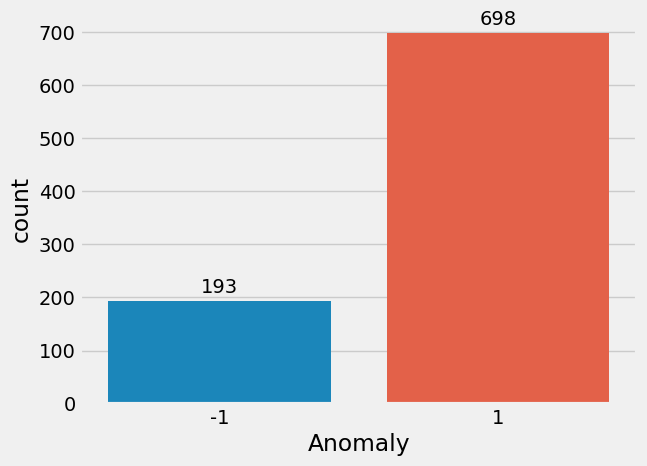

In [49]:
# plot the anomaly result
ax = sns.countplot(data = df, x = 'Anomaly')
add_values(ax)

In [50]:
# remove rows that counted as anomaly
df = df.drop(df[df['Anomaly'] == -1].index)
df = df.drop(['Anomaly', 'Anomalies_Score'], axis=1)

In [51]:
# function for showing the category values
def add_values(ax): 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

<AxesSubplot: >

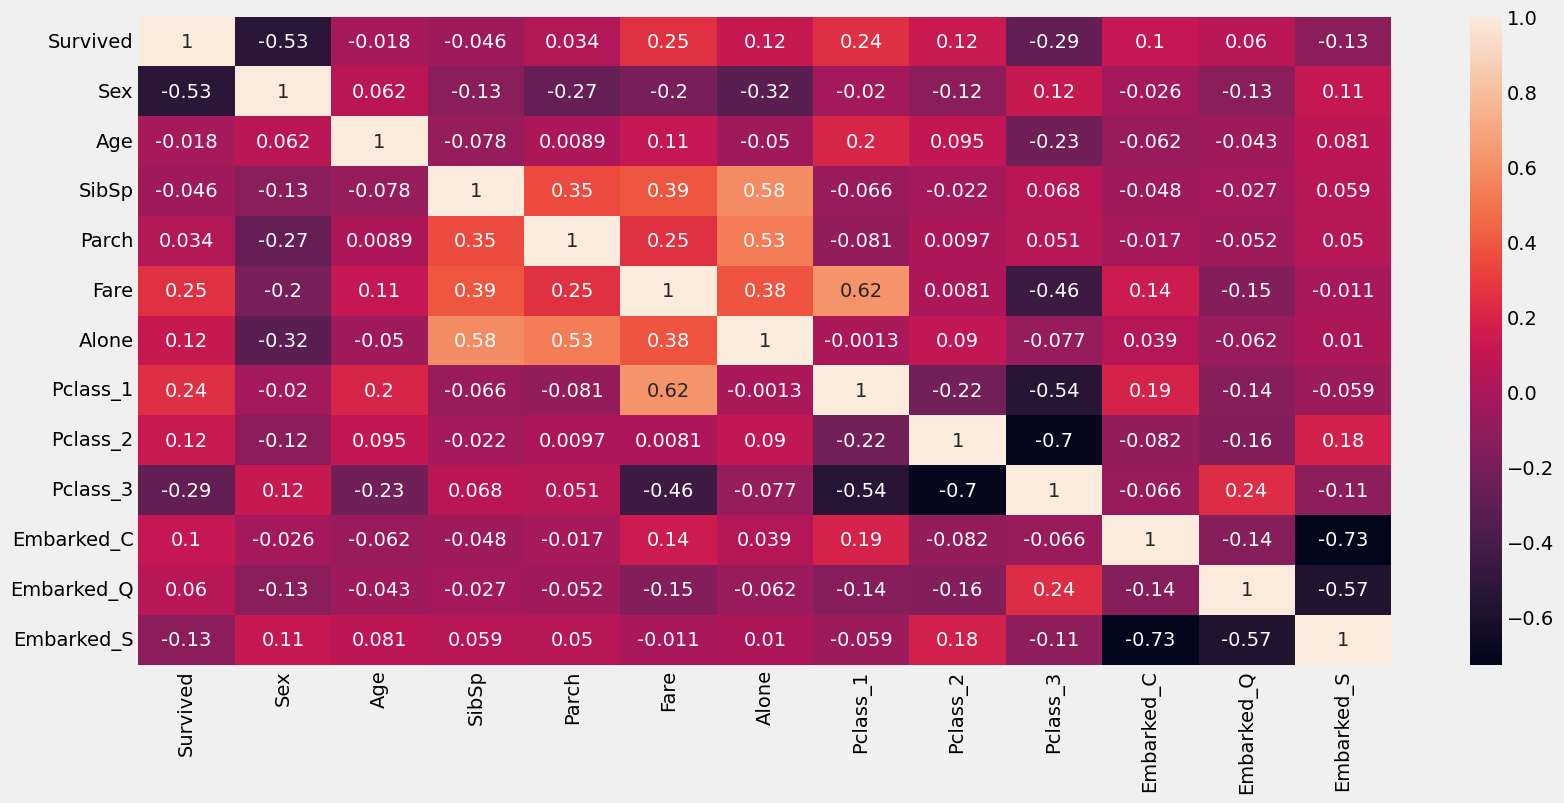

In [52]:
ax = plt.figure(figsize = (18,8))
sns.heatmap(df.corr(), annot = True)

In [54]:
# Splitting Data
X, y= df.drop('Survived', axis=1), df['Survived']

### 5. Data Modelling
Objectives : Build Best Performing Model
- Build Multiple Models for Comparison
- Hyperparameter Tuning 
- Model Training on Test Dataset 

In [55]:
from sklearn.model_selection import cross_val_score, KFold

In [67]:
"""
Model that i will used for model comparison : 
1. XGBClassifier
2. GradientBoostingClassifier
3. CatBoost
4. Logistic Regression
5. Decision Tree
6. RandomForestClassifier
"""
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

In [68]:
cv = KFold(n_splits = 5,shuffle=True, random_state=42)
models = [gb, xgb, cat, rf, dt, lr]
for model in models : 
    score = cross_val_score(model, X, y, cv = 5)
    score = np.mean(score)
    print(model)
    print(f'Acc Score : {score}')

GradientBoostingClassifier(random_state=42)
Acc Score : 0.8309660842754368
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
Acc Score : 0.8152004110996917
Learning rate set to 0.008031
0:	learn: 0.6882912	total: 3.6ms	remaining: 3.6s
1:	learn: 0.6824135	total: 6.45ms	remaining: 3.22s
2:	learn: 0.67

**Best Model : XGBoost**

In [70]:
# XGBoost Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=cv, verbose=3)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...learning_rate=0.01, max_depth=3;, score=0.743 total time=   0.5s
[CV 2/5] END ...learning_rate=0.01, max_depth=3;, score=0.800 total time=   0.3s
[CV 3/5] END ...learning_rate=0.01, max_depth=3;, score=0.829 total time=   0.3s
[CV 4/5] END ...learning_rate=0.01, max_depth=3;, score=0.827 total time=   0.3s
[CV 5/5] END ...learning_rate=0.01, max_depth=3;, score=0.863 total time=   0.3s
[CV 1/5] END ...learning_rate=0.01, max_depth=5;, score=0.764 total time=   0.5s
[CV 2/5] END ...learning_rate=0.01, max_depth=5;, score=0.821 total time=   0.5s
[CV 3/5] END ...learning_rate=0.01, max_depth=5;, score=0.807 total time=   0.6s
[CV 4/5] END ...learning_rate=0.01, max_depth=5;, score=0.784 total time=   0.5s
[CV 5/5] END ...learning_rate=0.01, max_depth=5;, score=0.863 total time=   0.5s
[CV 1/5] END ...learning_rate=0.01, max_depth=7;, score=0.771 total time=   0.9s
[CV 2/5] END ...learning_rate=0.01, max_depth=7;,

In [71]:
best_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, random_state=42)

### 6. Submission

##### Must clean & preprocess test set first

In [72]:
test = pd.read_csv(r'D:/Data Science Project/Titanic Prediction (Improving)/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [73]:
test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
# replace missing values on age with mean
mean = test['Age'].mean(skipna=True) 
test['Age'] = test['Age'].fillna(mean)
# replace missing values on age with mean
mean = test['Fare'].mean(skipna=True) 
test['Fare'] = test['Fare'].fillna(mean)
# replace missing value on embarked with mode
mode = test['Embarked'].mode() 
test['Embarked'] = test['Embarked'].fillna(mode[0])
print(f'Number of Missing Val = {test.isnull().sum().sum()}')

Number of Missing Val = 0


In [74]:
test.shape

(418, 7)

In [75]:
# feature engineering : Create alone status
test['Alone'] = test['Parch'] + test['SibSp']
test['Alone'] = test['Alone'].apply(lambda x: 1 if x != 0 else 0)

# fix data types
test['Pclass'] = test['Pclass'].astype('object')
test['Alone'] = test['Alone'].astype('object')

# feature encoding 
test['Sex'] = le.fit_transform(test['Sex'])
test['Alone'] = le.fit_transform(test['Alone'])
test = pd.get_dummies(test)

# feature scaling 
test[['Age', 'Fare']] = StandardScaler().fit_transform(test[['Age', 'Fare']])

##### Model Predict Test Dataset

In [76]:
best_model = best_model.fit(X, y)
y_pred = best_model.predict(test)

In [77]:
submission = pd.read_csv(r'D:/Data Science Project/Titanic Prediction (Improving)/gender_submission.csv')
submission['Survived'] = y_pred
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [83]:
submission.to_csv('Titanic Competition.csv', index=False)